In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart1/heart.csv


In [2]:
# data loading
data = pd.read_csv(r"/kaggle/input/heart1/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


> **Features Description**

Age : age of the patient (Years)

Sex : sex of the patient (M: Male, F: Female)

ChestPainType : chest pain type

TA: Typical Angina,

ATA: Atypical Angina,

NAP: Non-Anginal Pain,

ASY: Asymptomatic

RestingBP : resting blood pressure (mm Hg)

Cholesterol: serum cholesterol (mm/dl)

FastingBS : fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

RestingECG : resting electrocardiogram results

Normal: Normal,

ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),

LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

MaxHR : maximum heart rate achieved (Numeric value between 60 and 202)

ExerciseAngina : exercise-induced angina (Y: Yes, N: No)

Oldpeak : oldpeak = ST (Numeric value measured in depression)

ST_Slope : the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

HeartDisease : output class (1: heart disease, 0: Normal)

In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
data.Age.min()


28

In [10]:
data.Age.max()

77

**Data Analysis**

Age:

We found the Min and Max age of Patient's from 28 to 77 included in the dataset. The distribution of age is left skewed so that, the mean of age is slightly less than the median. There is no such a difference observed in the distribution of Age with or without Heart Disease. So, we can say that, Age may not be major factor to diagnose the Heart Failure.



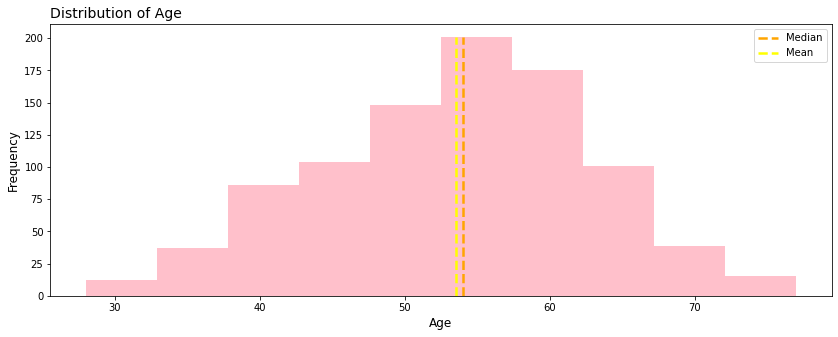

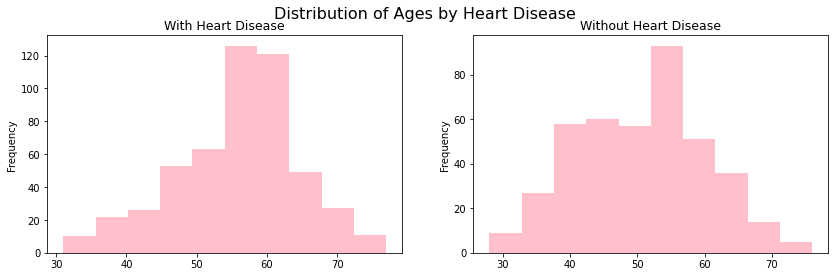

In [11]:
# data preparation for distribution of ages.
ageMed=data.Age.median()
ageMean = data.Age.mean()

# grouped data by target feature 'HeartDisease'
group = data.groupby(['HeartDisease'])
hd_df = group.get_group(1)
nhd_df = group.get_group(0)

# selecting age by heart disease
a = hd_df['Age']
b = nhd_df['Age']

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.Age ,color = 'pink')
plt.vlines(ageMed, ymin=0, ymax=201,color = 'orange',  ls='--', lw=2.5, label='Median')
plt.vlines(ageMean, ymin=0, ymax=201,color = 'yellow', ls='--', lw=2.5, label='Mean')

plt.xlabel('Age', size = 12)
plt.ylabel('Frequency',size =12)
plt.title("Distribution of Age", size = 14,loc='left')
plt.legend( fancybox = True)

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0], color = 'pink')
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], color = 'pink')
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16)
plt.show()


Sex  HeartDisease        
F    Without HeartDisease    143
     With HeartDisease        50
M    Without HeartDisease    267
     With HeartDisease       458
Name: HeartDisease, dtype: int64


Text(0.5, 1.0, 'MALE & FEMALE RATIO OF HEARTDIASIES')

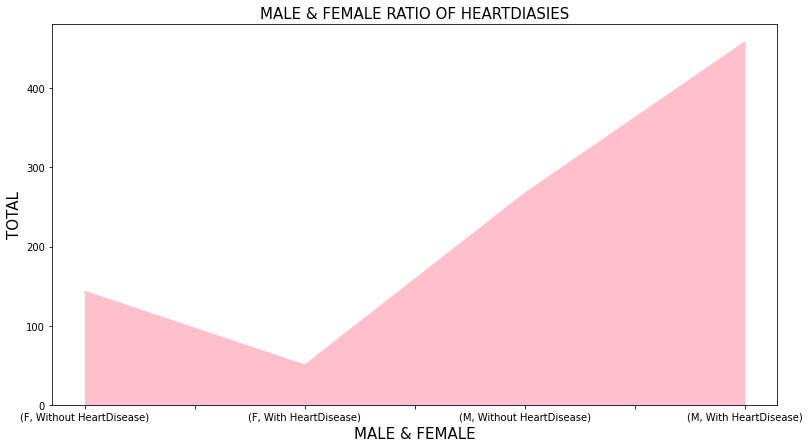

In [12]:
# male female ratio for heart disease
group1 = data.groupby(['Sex','HeartDisease'])['HeartDisease'].apply(lambda x: x.count())
group1.rename(index={0:'Without HeartDisease',1:'With HeartDisease'},inplace = True)
print(group1)


plt.figure(figsize=(13, 7) )
group1.plot.area(color = 'pink')
plt.xlabel('MALE & FEMALE',fontsize=15 )
plt.ylabel('TOTAL', fontsize = 15)
plt.title("MALE & FEMALE RATIO OF HEARTDIASIES", loc='center', size = 15)

**Blood Pressure**

This shows that the some of the patients having higher blood pressure values. While comparing the distribution of BP with and without Heart Disease, we can see that the patient with heart disease have higher blood pressure.

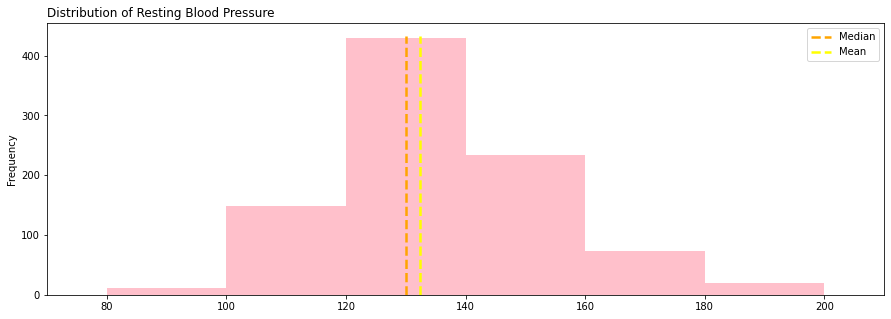

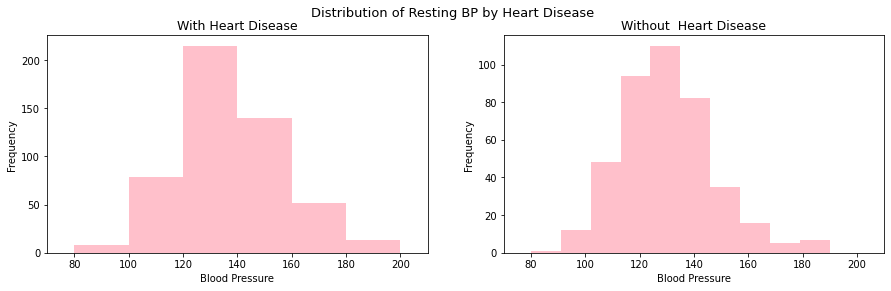

In [13]:
#  distribution of RestingBP.

bpMed = data.RestingBP.median()
bpMean = data.RestingBP.mean()

# grouped data by target feature 'HeartDisease'

a = hd_df['RestingBP'] # with HeartDisease
b = nhd_df['RestingBP'] # without HeartDisease

# plot
plt.figure(figsize=(15, 5))
plt.hist(data.RestingBP, color = 'pink')
plt.vlines(bpMed, ymin=-0, ymax=433, color='orange', ls='--', lw=2.5, label='Median')
plt.vlines(bpMean, ymin=0, ymax=433, color='yellow',ls='--',lw=2.5, label='Mean')

plt.xlim(70, 210)
plt.ylabel('Frequency')
plt.title("Distribution of Resting Blood Pressure", loc='left')
plt.legend()

# subplots

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1 = a.plot(kind='hist', ax=axs[0], color ='pink' )
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Blood Pressure')
ax1.set_xlim(70, 210)

ax2 = b.plot(kind='hist', ax=axs[1],color ='pink')
ax2.set_title('Without  Heart Disease', size=12.5)
ax2.set_xlabel('Blood Pressure')
ax2.set_xlim(70, 210)

fig.suptitle('Distribution of Resting BP by Heart Disease', size=13 )
plt.show()

**Serum Cholesterol[mm/dl]**

The distribution of serum cholesterol which shows that the some of the patients with high cholesterol values. The comparison shows that patient's with Heart Disease have higher cholesterol as compare to the patient without Heart Disease.



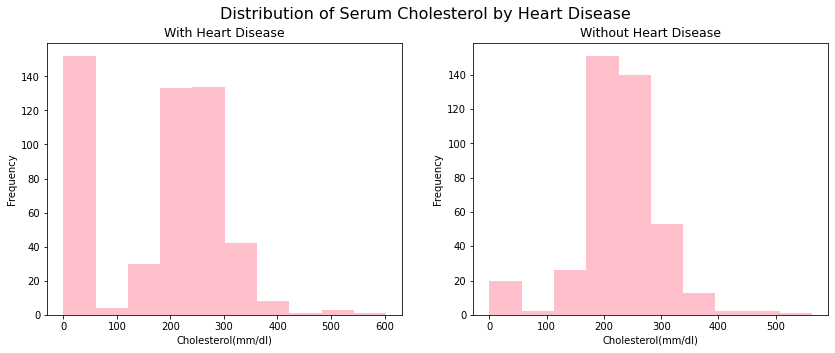

In [14]:
# grouped data by target feature 'HeartDisease'
a = hd_df['Cholesterol']
b = nhd_df['Cholesterol']

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1 = a.plot(kind='hist', ax=axs[0], color= 'pink')
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Cholesterol(mm/dl)')

ax2 = b.plot(kind='hist', ax=axs[1] , color ='pink')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel('Cholesterol(mm/dl)')

fig.suptitle('Distribution of Serum Cholesterol by Heart Disease', size=16)
plt.show()

**FastingBS**

The bar plot shows that, the most of the patients have had fasting blood sugar less than 120 mg/dl. Most of patients with high blood sugar have heart disease. However, there is no such difference between the number of patients with fasting blood sugar less than 120.

In [15]:
# grouped data by target feature 'HeartDisease'
a = hd_df['FastingBS'].value_counts()
a.rename(index={0:'False', 1:'True'}, inplace=True)
print(a)
b = nhd_df['FastingBS'].value_counts()
b.rename(index={0:'False', 1:'True'}, inplace=True)
print(b)

df = data.groupby(['FastingBS']).count()['HeartDisease']
df.rename(index={0:'False', 1:'True'}, inplace=True)
print(df)

False    338
True     170
Name: FastingBS, dtype: int64
False    366
True      44
Name: FastingBS, dtype: int64
FastingBS
False    704
True     214
Name: HeartDisease, dtype: int64


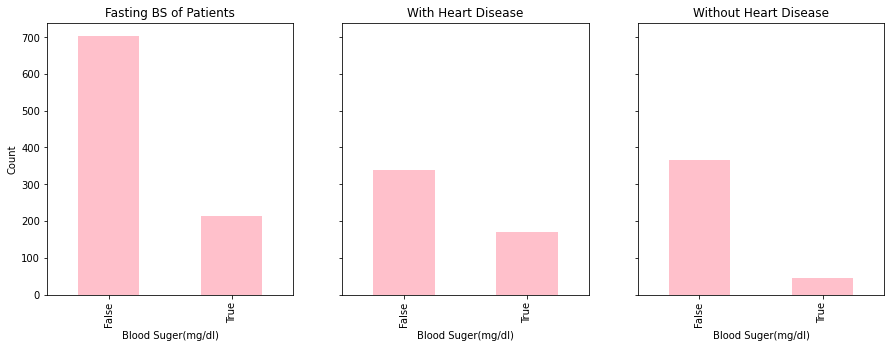

In [16]:
# plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax1 = df.plot(kind='bar', ax=axs[0],color = 'pink' )
ax1.set_xlabel('Blood Suger(mg/dl)')
ax1.set_ylabel('Count')
ax1.set_title("Fasting BS of Patients")

ax2 = a.plot(kind='bar', ax=axs[1], color = 'pink')
ax2.set_xlabel('Blood Suger(mg/dl)')
ax2.set_title("With Heart Disease")

ax3 = b.plot(kind='bar', ax=axs[2], color='pink')
ax3.set_xlabel('Blood Suger(mg/dl)')
ax3.set_title("Without Heart Disease")
plt.show()

**MaxHR (Maximum Heart Rate)**

The distribution of maximum heart rate which shows that, some of the patients have comparatively low heart rate. The maximum heart rate of patients without heart disease shows a higher heart rate (around 160) as compare to maximum heart rate of patients with heart disease(~120). The histogram of people without heart disease shows the leptokurtic ditribution.



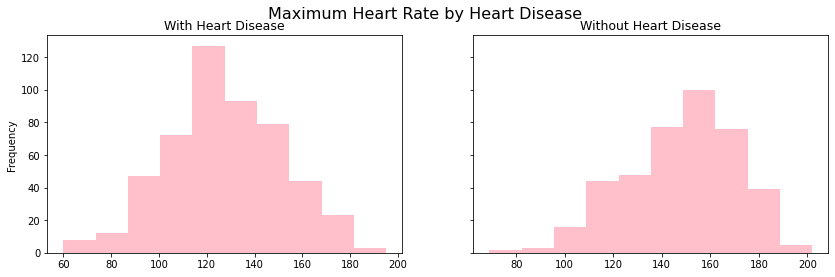

In [17]:
# grouped data by target feature 'HeartDisease'
a = hd_df['MaxHR']
b = nhd_df['MaxHR']


# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
ax1 = a.plot(kind='hist', ax=axs[0], color='pink')
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], color ='pink')
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Maximum Heart Rate by Heart Disease', size=16)
plt.show()

**Gender Classification of People with Heart Disease and without Heart Disease **

in this data showes that there is 79% Men are going to hospital for appiotment of Heartdisease this percentage shoes that Man Ratio is more then female.

90% of people with heart disease are male, which shows that men are more likely to have a heart disease than women.
Then also 65% of people with no heart disease are male,then again which shows that men are more likely to have a no heart disease than women.


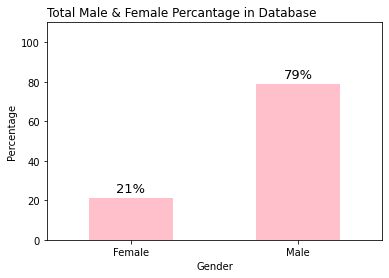

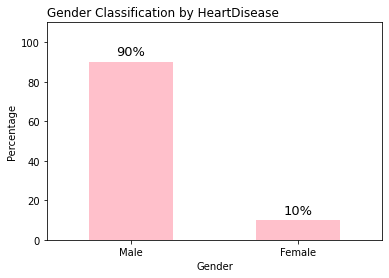

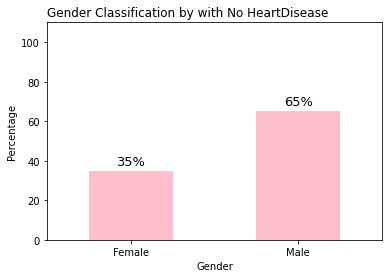

In [18]:


Sex = data.groupby(['Sex']).count()['Age']
Sex.rename(index= {'F':'Female','M':'Male'},inplace =True)
Sex =(Sex/Sex.sum())*100

cx1 = Sex.plot.bar(color= 'pink')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Total Male & Female Percantage in Database', loc='left')
# annotation
i = 0
for val in Sex.values:
    plt.text( i,val+3, str(round(val))+'%', size=13, ha='center')
    i += 1
plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.show()

# Grouping data based on sex values on Data of people with HeartDisease.
a = hd_df.groupby('Sex').count()['Age'].sort_values(ascending=False)
a = (a/a.sum())*100
a.rename(index={'M':'Male', 'F':'Female'}, inplace=True)
ax1 = a.plot(kind='bar',color= 'pink' )
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Classification by HeartDisease', loc='left')

# annotation
i = 0
for val in a.values:
    plt.text( i,val+3, str(round(val))+'%', size=13, ha='center')
    i += 1
plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.show()

# Grouping data based on sex values on Data of people without HeartDisease.
b = nhd_df.groupby('Sex').count()['Age'].sort_values(ascending = True)
b = (b/b.sum())*100
b.rename(index={'M':'Male','F':'Female'}, inplace= True)

bx1 = b.plot(kind='bar',color= 'pink' )
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Classification by with No HeartDisease', loc='left')

# annotation
i = 0
for val in b.values:
    plt.text( i,val+3, str(round(val))+'%', size=13, ha='center')
    i += 1
plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.show()

